Basic neural network using jax

importing libraries

In [11]:
import jax
import jax.numpy as jnp
from jax import random, grad
import optax

# Set random key for reproducibility


In [17]:
key = random.PRNGKey(0)
print (key)

[0 0]


# Define network architecture


In [19]:
input_size = 2  # Number of input features
hidden_size = 4  # Number of hidden layer neurons
output_size = 1  # Output size

# Initialize weights and biases for two layers

In [48]:

def init_weights(key, input_size, hidden_size, output_size):
    key, subkey = random.split(key)
    # print ("key " , key, "subkey " , subkey)
    W1 = random.normal(subkey, (input_size, hidden_size)) * 0.1  # First layer weights
    b1 = jnp.zeros(hidden_size)  # First layer bias
    key, subkey = random.split(key)
    W2 = random.normal(subkey, (hidden_size, output_size)) * 0.1  # Second layer weights
    b2 = jnp.zeros(output_size)  # Second layer bias
    return W1, b1, W2, b2

# Define the forward pass function


In [49]:
def forward(W1, b1, W2, b2, X):
    hidden = jnp.dot(X, W1) + b1
    hidden = jax.nn.sigmoid(hidden)  # Sigmoid activation function
    output = jnp.dot(hidden, W2) + b2  # Linear output
    return output


# Loss function: Mean Squared Error


In [50]:
def loss_fn(W1, b1, W2, b2, X, Y):
    predictions = forward(W1, b1, W2, b2, X)
    return jnp.mean((predictions - Y) ** 2)

# Set up optimization using Optax


In [102]:
learning_rate = 0.001
optimizer = optax.sgd(learning_rate)

# Generate synthetic data (e.g., XOR problem)


In [103]:
X = jnp.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # 4 examples, 2 features
Y = jnp.array([[0], [1], [1], [0]])  # XOR output

# Initialize parameters


In [104]:
params = init_weights(key, input_size, hidden_size, output_size)


# Initialize the optimizer state


In [105]:
opt_state = optimizer.init(params)


# Training loop (simple gradient descent)


In [106]:
num_epochs = 6000
loss=[]
for epoch in range(num_epochs):
    # Compute gradients
    grads = grad(loss_fn)(params, X, Y)
    
    # Update weights and biases
    updates, opt_state = optimizer.update(grads, opt_state, params)
    params = optax.apply_updates(params, updates)
    
    # Print loss every 100 epochs
    if epoch % 100 == 0:
        current_loss = loss_fn(params, X, Y)
        loss.append(current_loss)
        print(f"Epoch {epoch}, Loss: {current_loss:.4f}")



Epoch 0, Loss: 0.4249
Epoch 100, Loss: 0.3280
Epoch 200, Loss: 0.2847
Epoch 300, Loss: 0.2654
Epoch 400, Loss: 0.2569
Epoch 500, Loss: 0.2530
Epoch 600, Loss: 0.2514
Epoch 700, Loss: 0.2506
Epoch 800, Loss: 0.2503
Epoch 900, Loss: 0.2501
Epoch 1000, Loss: 0.2501
Epoch 1100, Loss: 0.2500
Epoch 1200, Loss: 0.2500
Epoch 1300, Loss: 0.2500
Epoch 1400, Loss: 0.2500
Epoch 1500, Loss: 0.2500
Epoch 1600, Loss: 0.2500
Epoch 1700, Loss: 0.2500
Epoch 1800, Loss: 0.2500
Epoch 1900, Loss: 0.2500
Epoch 2000, Loss: 0.2500
Epoch 2100, Loss: 0.2500
Epoch 2200, Loss: 0.2500
Epoch 2300, Loss: 0.2500
Epoch 2400, Loss: 0.2500
Epoch 2500, Loss: 0.2500
Epoch 2600, Loss: 0.2500
Epoch 2700, Loss: 0.2500
Epoch 2800, Loss: 0.2500
Epoch 2900, Loss: 0.2500
Epoch 3000, Loss: 0.2500
Epoch 3100, Loss: 0.2500
Epoch 3200, Loss: 0.2500
Epoch 3300, Loss: 0.2500
Epoch 3400, Loss: 0.2500
Epoch 3500, Loss: 0.2500
Epoch 3600, Loss: 0.2500
Epoch 3700, Loss: 0.2500
Epoch 3800, Loss: 0.2500
Epoch 3900, Loss: 0.2500
Epoch 4000, 

plotting loss function

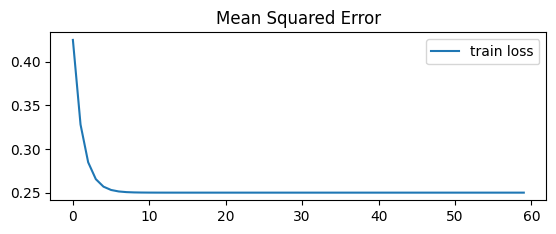

In [107]:
import matplotlib.pyplot as pyplot
pyplot.subplot(212)
pyplot.title('Mean Squared Error')
pyplot.plot(loss, label='train loss')
pyplot.legend()
pyplot.show()

# Final predictions after training


In [88]:
predictions = forward(params, X)
print("Final predictions:", predictions)

Final predictions: [[0.4821211 ]
 [0.482998  ]
 [0.4840128 ]
 [0.48488232]]
